# Stock news sentiment analysis

In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

Set up url paths

In [2]:
finviz_url = "https://finviz.com/quote.ashx?t="
tickers = ["GME", "TSLA", "NVDA", "ATVI", "MTCH"]

## Scrape web data 

In [3]:
news_tables = {}

for ticker in tickers:
    # form url for chosen ticker
    url = finviz_url + ticker
    # submit request to finwiz website
    req = Request(url=url, headers={"user-agent": "senti-app"})
    # parse html from request object
    html = BeautifulSoup(urlopen(req), "html")
    # extract table which holds news titles
    news_tables[ticker] = html.find(id="news-table")

In [4]:
news_tables

{'GME': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
 <tr><td align="right" style="white-space:nowrap" width="130">Mar-16-21 06:15AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2021/03/16/forget-amc-and-gamestop-2-popular-robinhood-stocks/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">Forget AMC and Gamestop: These 2 Popular Robinhood Stocks Are Better Buys</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Motley Fool</span></div></div></td></tr>
 <tr><td align="right" width="130">06:06AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2021/03/16/4-heavily-short-sold-stocks-avoid-like-the-plague/?source=eptyholnk0000202&amp;utm_sour

## Extract article info from table rows

In [5]:
parsed_data = []
for ticker, news_table in news_tables.items():
    for row in news_table.findAll("tr"):
        # specify elements
        title = row.a.text
        date_data = row.td.text.split()

        # if only time is given
        if len(date_data) == 1:
            time = date_data[0]
        # if both time and date are given
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])


In [6]:
parsed_data

[['GME',
  'Mar-16-21',
  '06:15AM',
  'Forget AMC and Gamestop: These 2 Popular Robinhood Stocks Are Better Buys'],
 ['GME',
  'Mar-16-21',
  '06:06AM',
  '4 Heavily Short-Sold Stocks to Avoid Like the Plague'],
 ['GME',
  'Mar-15-21',
  '04:30PM',
  'These Are The Best Robinhood Stocks To Buy Or Watch Now'],
 ['GME',
  'Mar-15-21',
  '04:20PM',
  'GameStop Stock Fell So Much It Had to be Halted. That Didnt Stop the Selloff.'],
 ['GME',
  'Mar-15-21',
  '04:16PM',
  'GameStop Roller-Coaster Hits Bump as Trading Volume Dries Up'],
 ['GME',
  'Mar-15-21',
  '11:30AM',
  'AMC soars 20%, plans to reopen California theaters this week'],
 ['GME',
  'Mar-15-21',
  '11:14AM',
  'AMC Theaters Reopen in L.A., After a Long Pandemic Year'],
 ['GME',
  'Mar-15-21',
  '09:28AM',
  'What You Need To Know In Options This Week: Tesla, GameStop, Nike, CrowdStrike, FedEx And More'],
 ['GME',
  'Mar-15-21',
  '09:05AM',
  'GameStop and AMC Actually Did Improve Their Fundamentals Last Week'],
 ['GME',
  '

## Apply sentiment analysis to headlines

In [7]:
df = pd.DataFrame(parsed_data, columns=["ticker", "date", "time", "title"])
df

,ticker,date,time,title
0,GME,Mar-16-21,06:15AM,Forget AMC and Gamestop: These 2 Popular Robin...
1,GME,Mar-16-21,06:06AM,4 Heavily Short-Sold Stocks to Avoid Like the ...
2,GME,Mar-15-21,04:30PM,These Are The Best Robinhood Stocks To Buy Or ...
3,GME,Mar-15-21,04:20PM,GameStop Stock Fell So Much It Had to be Halte...
4,GME,Mar-15-21,04:16PM,GameStop Roller-Coaster Hits Bump as Trading V...
...,...,...,...,...
495,MTCH,Dec-09-20,08:19AM,3 Top Stocks to Buy in December
496,MTCH,Dec-08-20,06:55AM,Why Match Group's Stock Gained 19.2% in November
497,MTCH,Dec-08-20,06:43AM,Bottom-Fishing and Trend-Chasing: Exxon's Writ...
498,MTCH,Dec-07-20,01:11PM,Is MTCH A Good Stock To Buy Now?


In [8]:
vader = SentimentIntensityAnalyzer()
df["Sentiment"] = df.title.map(lambda t: vader.polarity_scores(t)["compound"])
df

,ticker,date,time,title,Sentiment
0,GME,Mar-16-21,06:15AM,Forget AMC and Gamestop: These 2 Popular Robin...,0.5859
1,GME,Mar-16-21,06:06AM,4 Heavily Short-Sold Stocks to Avoid Like the ...,0.0772
2,GME,Mar-15-21,04:30PM,These Are The Best Robinhood Stocks To Buy Or ...,0.6369
3,GME,Mar-15-21,04:20PM,GameStop Stock Fell So Much It Had to be Halte...,0.2235
4,GME,Mar-15-21,04:16PM,GameStop Roller-Coaster Hits Bump as Trading V...,0.0000
...,...,...,...,...,...
495,MTCH,Dec-09-20,08:19AM,3 Top Stocks to Buy in December,0.2023
496,MTCH,Dec-08-20,06:55AM,Why Match Group's Stock Gained 19.2% in November,0.3818
497,MTCH,Dec-08-20,06:43AM,Bottom-Fishing and Trend-Chasing: Exxon's Writ...,0.0000
498,MTCH,Dec-07-20,01:11PM,Is MTCH A Good Stock To Buy Now?,0.4404


## Process data for visualisation

In [9]:
df["date"] = pd.to_datetime(df.date).dt.date
df

,ticker,date,time,title,Sentiment
0,GME,2021-03-16,06:15AM,Forget AMC and Gamestop: These 2 Popular Robin...,0.5859
1,GME,2021-03-16,06:06AM,4 Heavily Short-Sold Stocks to Avoid Like the ...,0.0772
2,GME,2021-03-15,04:30PM,These Are The Best Robinhood Stocks To Buy Or ...,0.6369
3,GME,2021-03-15,04:20PM,GameStop Stock Fell So Much It Had to be Halte...,0.2235
4,GME,2021-03-15,04:16PM,GameStop Roller-Coaster Hits Bump as Trading V...,0.0000
...,...,...,...,...,...
495,MTCH,2020-12-09,08:19AM,3 Top Stocks to Buy in December,0.2023
496,MTCH,2020-12-08,06:55AM,Why Match Group's Stock Gained 19.2% in November,0.3818
497,MTCH,2020-12-08,06:43AM,Bottom-Fishing and Trend-Chasing: Exxon's Writ...,0.0000
498,MTCH,2020-12-07,01:11PM,Is MTCH A Good Stock To Buy Now?,0.4404


Get the average sentiment of aricles for each date

In [10]:
mean_df = df.groupby(["ticker", "date"]).mean()
mean_df

Sentiment
ticker date                 
ATVI   2021-02-01   0.510600
       2021-02-02   0.000000
       2021-02-03   0.228050
       2021-02-04   0.216580
       2021-02-05   0.243075
...                      ...
TSLA   2021-03-12  -0.054527
       2021-03-13   0.023187
       2021-03-14  -0.034208
       2021-03-15  -0.040838
       2021-03-16  -0.085000

[111 rows x 1 columns]

In [11]:
# have date as the column
mean_df = mean_df.unstack()  
mean_df

Sentiment                                                         \
date   2020-12-07 2020-12-08 2020-12-09 2020-12-10 2020-12-18 2020-12-19   
ticker                                                                     
ATVI          NaN        NaN        NaN        NaN        NaN        NaN   
GME           NaN        NaN        NaN        NaN        NaN        NaN   
MTCH      0.43095     0.1909     0.2023    -0.5216    -0.2294        0.0   
NVDA          NaN        NaN        NaN        NaN        NaN        NaN   
TSLA          NaN        NaN        NaN        NaN        NaN        NaN   

                                                    ...                        \
date   2020-12-20 2020-12-21 2020-12-22 2020-12-24  ... 2021-03-07 2021-03-08   
ticker                                              ...                         
ATVI          NaN        NaN        NaN        NaN  ...     0.0000    0.00000   
GME           NaN        NaN        NaN        NaN  ...        NaN        NaN   
MTCH          0.0   -0.26335        0.0        0.0  ...     0.0000    0.31845   
NVDA          NaN        NaN        NaN        NaN  ...    -0.5267    0.13570   
TSLA          NaN        NaN        NaN        NaN  ...        NaN        NaN   

                                                                          \
date   2021-03-09 2021-03-10 2021-03-11 2021-03-12 2021-03-13 2021-03-14   
ticker                                                                     
ATVI          NaN   0.241500        NaN        NaN        NaN   0.636900   
GME      0.161317   0.022035   0.125573   0.104250   0.346267   0.000000   
MTCH          NaN        NaN  -0.042667   0.000000   0.000000        NaN   
NVDA     0.270069   0.111100   0.295667   0.220200   0.419600   0.220200   
TSLA          NaN        NaN  -0.290960  -0.054527   0.023187  -0.034208   

                              
date   2021-03-15 2021-03-16  
ticker                        
ATVI     0.525600    0.65530  
GME      0.135783    0.33155  
MTCH     0.000000        NaN  
NVDA     0.352800    0.72690  
TSLA    -0.040838   -0.08500  

[5 rows x 65 columns]

In [12]:
# remove Sentiment as column title
mean_df = mean_df.xs("Sentiment", axis="columns").transpose()  
mean_df

ticker,ATVI,GME,MTCH,NVDA,TSLA
date,,,,,
2020-12-07,NaN,NaN,0.43095,NaN,NaN
2020-12-08,NaN,NaN,0.19090,NaN,NaN
2020-12-09,NaN,NaN,0.20230,NaN,NaN
2020-12-10,NaN,NaN,-0.52160,NaN,NaN
2020-12-18,NaN,NaN,-0.22940,NaN,NaN
...,...,...,...,...,...
2021-03-12,NaN,0.104250,0.00000,0.2202,-0.054527
2021-03-13,NaN,0.346267,0.00000,0.4196,0.023187
2021-03-14,0.6369,0.000000,NaN,0.2202,-0.034208


## Visualise sentiment across dates

<AxesSubplot:xlabel='date'>

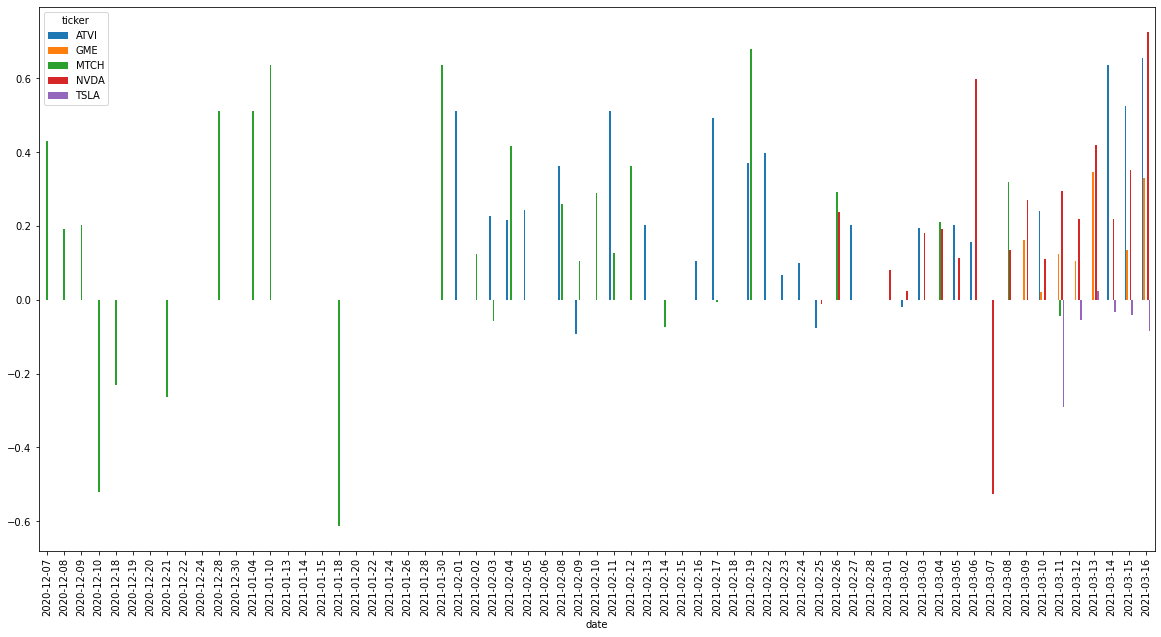

In [13]:
plt.rcParams["figure.figsize"] = (20,10)
mean_df.plot(kind="bar")